In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
first_data = pd.read_csv('ex2data1.txt',header=None,names=['Fisrt Score', 'Second Score', 'Admitted'])
print(first_data.head())

   Fisrt Score  Second Score  Admitted
0    34.623660     78.024693         0
1    30.286711     43.894998         0
2    35.847409     72.902198         0
3    60.182599     86.308552         1
4    79.032736     75.344376         1


In [3]:
print(first_data.describe())

       Fisrt Score  Second Score    Admitted
count   100.000000    100.000000  100.000000
mean     65.644274     66.221998    0.600000
std      19.458222     18.582783    0.492366
min      30.058822     30.603263    0.000000
25%      50.919511     48.179205    0.000000
50%      67.032988     67.682381    1.000000
75%      80.212529     79.360605    1.000000
max      99.827858     98.869436    1.000000


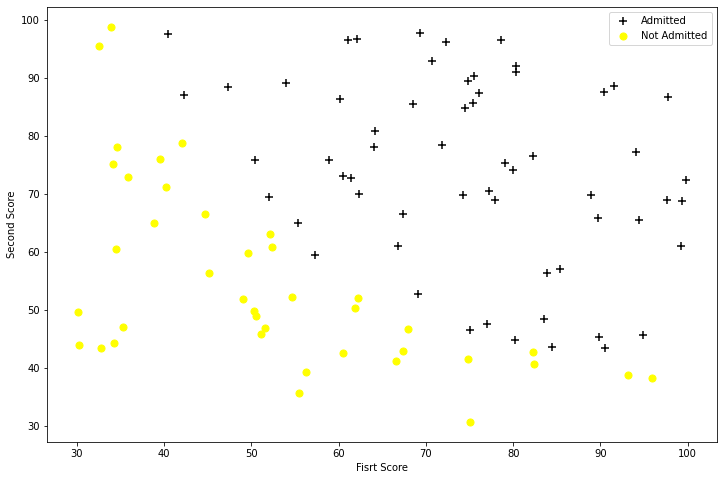

In [4]:
positive = first_data[first_data['Admitted']==1]
negtive = first_data[first_data['Admitted']==0]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Fisrt Score'],positive['Second Score'],s=50,c='black',marker='+',label='Admitted')
ax.scatter(negtive['Fisrt Score'],negtive['Second Score'],s=50,c='yellow',marker='o',label='Not Admitted')
ax.legend(loc='best')
ax.set_xlabel('Fisrt Score')
ax.set_ylabel('Second Score')
plt.show()

In [5]:
def hTheta(X, theta):
    return X * theta.T
def sigmoid(z):
    return 1 / (1+np.exp(-z))

# Test hTheta

In [6]:
test_X = np.mat([[1,2,3],[4,5,6]])
test_theta = np.mat([[1,1,1]])
print(hTheta(test_X,test_theta))

[[ 6]
 [15]]


# Test sigmoid

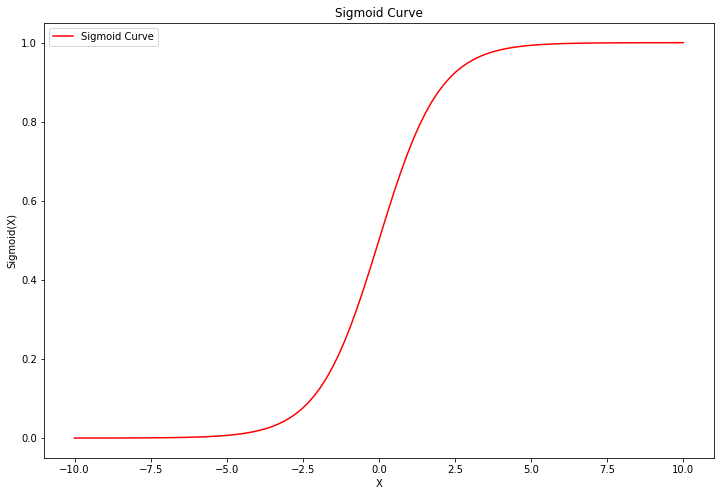

In [7]:
test_x = np.linspace(-10,10,100)
test_y = sigmoid(test_x)
_, ax = plt.subplots(figsize=(12,8))
ax.plot(test_x,test_y,c='r',label='Sigmoid Curve')
ax.legend(loc='best')
ax.set_xlabel('X')
ax.set_ylabel('Sigmoid(X)')
ax.set_title('Sigmoid Curve')
plt.show()

# test costFunction

In [8]:
first_data.insert(0,'Ones',1)
cols = first_data.shape[-1]
X = np.mat(first_data.iloc[:,:cols-1])
y = np.mat(first_data.iloc[:,cols-1:cols])

In [9]:
def costFunction(X,y,theta):
    J = np.sum(-np.array(y) * np.array(np.log(sigmoid(hTheta(X, theta)))) - np.array(1 - y) * np.array(np.log(1 - sigmoid(hTheta(X, theta)))))/len(y)
    return J
def efficentCostFunction(X,y,theta):
    j_theta = -y.T * np.log(sigmoid(hTheta(X, theta)))-(1-y).T * np.log(1 - sigmoid(hTheta(X, theta)))
    return j_theta / len(y)

In [10]:
theta = np.mat([[0.,0.,0.]])
print(costFunction(X,y,theta))
print(efficentCostFunction(X,y,theta))

0.6931471805599453
[[0.69314718]]


In [11]:
def gradient(X,y,theta):
    temp_theta = np.mat(np.zeros(theta.shape))
    error = sigmoid(hTheta(X,theta)) - y
    for j in range(X.shape[-1]):
        temp_theta[0,j] = error.T * X[:,j] / len(X)
    return temp_theta

# Test gradient

In [12]:
print(gradient(X,y,theta))

[[ -0.1        -12.00921659 -11.26284221]]


In [13]:
def gradientDescent(X,y,theta,alpha,iters):
    loss_list = []
    update_theta = theta.copy()
    for _ in range(iters):
        update_theta -= alpha * gradient(X,y,update_theta)
        loss = costFunction(X,y,update_theta)
        loss_list.append(loss)
    return update_theta, loss_list

In [14]:
theta,loss_list = gradientDescent(X,y,theta,0.001,500)
print(theta)

[[-0.03477121  0.01066652  0.0007217 ]]


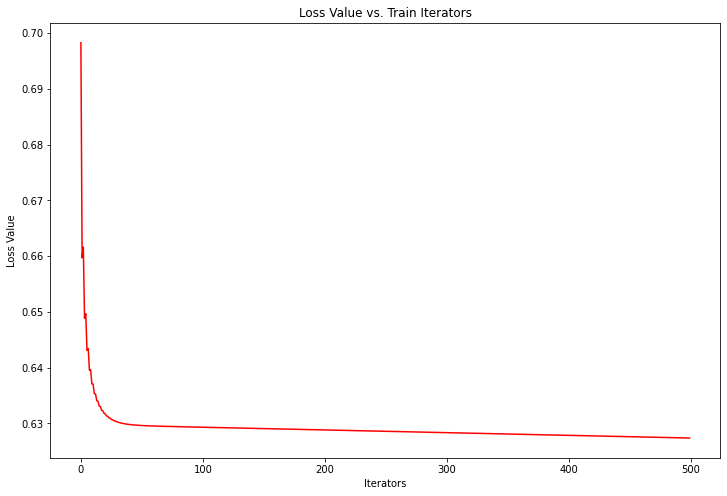

In [15]:
_, ax = plt.subplots(figsize=(12,8))
ax.plot(loss_list,c='r',label='Loss Curve')
ax.set_xlabel('Iterators')
ax.set_ylabel('Loss Value')
ax.set_title('Loss Value vs. Train Iterators')
plt.show()